# Example of an AR(1) process

In [120]:
using Distributions
using Plots

********** Case 1 : $X \in \mathbb R^2$, $A \in \mathcal M(2,2)$, $B \in \mathcal M(2,2)$ and $\epsilon  \mathcal N(0,I_2)$ **********

In [121]:
A = [0.5 1; -0.2 0.1]
B = [1 2; -1 1]

2×2 Matrix{Int64}:
  1  2
 -1  1

In [122]:
function simulate_next(Xt)
    return A*Xt+B*rand(Normal(0,1),(2,1))
end

function simulate_evolution(X0,T)
    evolution = X0'
    Xt=X0
    for k in 1:T 
        Xt = simulate_next(Xt)
        evolution=vcat(evolution,Xt')
    end
    return evolution
end

simulate_evolution (generic function with 2 methods)

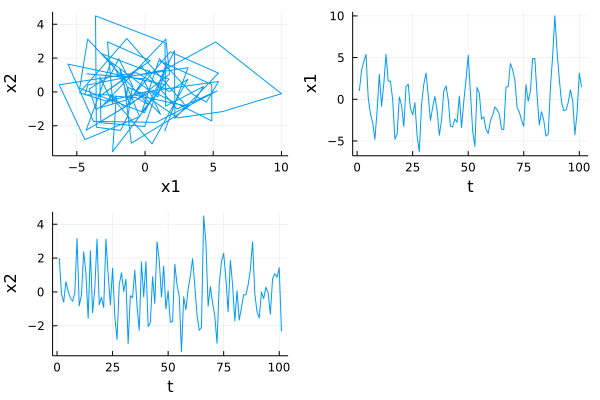

In [123]:
evolution = simulate_evolution(reshape([1.; 2.],2,1),100)
p1 = plot(evolution[:,1],evolution[:,2],xaxis = "x1",yaxis="x2",legend = false)
p2 = plot(evolution[:,1],xaxis = "t",yaxis="x1",legend = false)
p3 = plot(evolution[:,2],xaxis = "t",yaxis="x2",legend = false)
plot(p1,p2,p3)

********** Case 2 : $X \in \mathbb R^{n*2}$, $A \in \mathcal M(n,n)$, $B \in \mathcal M(n,n)$ and $\epsilon$ follows a  $\mathcal N(0,I)$ **********

In [124]:
n=10
A = rand(n,n)
B = rand(n,n)

10×10 Matrix{Float64}:
 0.00539405  0.514499   0.996277  0.943604  …  0.726908   0.238462  0.335444
 0.19843     0.823938   0.326329  0.66283      0.720871   0.673999  0.116961
 0.806389    0.0967398  0.172833  0.534032     0.30306    0.933931  0.739034
 0.00731286  0.587207   0.484446  0.264356     0.732102   0.584374  0.722265
 0.792924    0.143684   0.3061    0.770247     0.272463   0.387068  0.636593
 0.246561    0.737662   0.381075  0.123529  …  0.068996   0.383876  0.937732
 0.993838    0.718556   0.965863  0.376325     0.9908     0.72653   0.466376
 0.630313    0.985313   0.900209  0.296163     0.0966201  0.934464  0.342436
 0.989114    0.117116   0.104256  0.429388     0.740371   0.114965  0.64859
 0.813805    0.60981    0.46623   0.381592     0.523726   0.381289  0.103817

In [136]:
function simulate_next(Xt,n)
    return A*Xt+B*rand(Normal(0,1),(n,2))
end

function simulate_evolution(X0,T,n)
    evolution = reshape(X0,1,n,2)
    Xt=X0
    for k in 1:T 
        Xt = simulate_next(Xt,n)
        evolution = vcat(evolution,reshape(Xt,1,n,2))
    end
    return evolution
end

simulate_evolution (generic function with 2 methods)

In [137]:
simulate_evolution(rand(n,2),15,n)

16×10×2 Array{Float64, 3}:
[:, :, 1] =
     0.173274         0.100799    …      0.90511         0.294953
     1.07169          2.59515            2.41935         2.06245
    15.2931          14.8845            10.2822         13.925
    86.4268          79.5012            71.0064         79.1919
   480.366          424.411            382.197         423.246
  2594.07          2295.03        …   2076.57         2297.74
 14096.3          12474.7            11305.2         12492.4
 76646.7          67795.7            61435.9         67906.7
     4.1658e5    368469.0                3.33897e5       3.69079e5
     2.26414e6        2.0027e6           1.81481e6       2.006e6
     1.2306e7         1.0885e7    …      9.86376e6       1.09029e7
     6.68851e7        5.91615e7          5.36111e7       5.92592e7
     3.63531e8        3.21552e8          2.91384e8       3.22083e8
     1.97585e9        1.74769e9          1.58372e9       1.75057e9
     1.0739e10        9.49894e9          8.60776e9      

In [ ]:
static arrays